In [2]:
import json
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import vaep.pandas
import vaep.nb
import vaep.models

import logging
from vaep.logging import setup_logger
logger = setup_logger(logger=logging.getLogger('vaep'), level=10)

sns.set_theme()

plt.rcParams['figure.figsize'] = [16.0, 7.0]

In [3]:
IDX =[['proteinGroups', 'aggPeptides', 'evidence'],
      ['median', 'interpolated', 'collab', 'DAE', 'VAE']]

REPITITION_NAME = 'repeat'

In [4]:
def select_content(s:str):
    s = s.split('metrics_')[1]
    assert isinstance(s, str), f"More than one split: {s}"
    model, repeat = s.split('_')
    return model, int(repeat)
    
test_cases = ['model_metrics_DAE_0',
              'model_metrics_VAE_3',
              'model_metrics_collab_2']
 
for test_case in test_cases:
    print(f"{test_case} = {select_content(test_case)}")

def key_from_fname(fname:Path):
    model, repeat = select_content(fname.stem)
    key = (fname.parents[1].name, repeat)
    return key

model_metrics_DAE_0 = ('DAE', 0)
model_metrics_VAE_3 = ('VAE', 3)
model_metrics_collab_2 = ('collab', 2)


In [5]:
all_metrics = vaep.models.collect_metrics(snakemake.input.metrics, key_from_fname)
metrics = pd.DataFrame(all_metrics).T
metrics.index.names = ('data level', REPITITION_NAME)
metrics

vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_DAE_0.json')
vaep.models - DEBUG    key = ('proteinGroups', 0)
vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_DAE_1.json')
vaep.models - DEBUG    key = ('proteinGroups', 1)
vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_DAE_2.json')
vaep.models - DEBUG    key = ('proteinGroups', 2)
vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_DAE_3.json')
vaep.models - DEBUG    key = ('proteinGroups', 3)
vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_DAE_4.json')
vaep.models - DEBUG    key = ('proteinGroups', 4)
vaep.models - INFO     Load file: fname = Path('runs/repeat_best/proteinGroups/metrics/metrics_VAE_0.json')
vaep.models - DEBUG    key = ('proteinGroups', 0)
vaep.models - DEBUG    Found existing key: k = ('NA 

NA interpolated                                \
                       valid_fake_na                                 
                        interpolated                     DAE         
                                 MSE   MAE           N   MSE   MAE   
data level    repeat                                                 
proteinGroups 0                1.121 0.758  97,264.000 0.412 0.432   
              1                1.121 0.758  97,264.000 0.437 0.445   
              2                1.121 0.758  97,264.000 0.415 0.432   
              3                1.121 0.758  97,264.000 0.414 0.434   
              4                1.121 0.758  97,264.000 0.420 0.435   
aggPeptides   0                0.866 0.646 563,429.000 0.396 0.421   
              1                0.866 0.646 563,429.000 0.385 0.415   
              2                0.866 0.646 563,429.000 0.394 0.421   
              3                0.866 0.646 563,429.000 0.383 0.413   
              4                0.866 0.646 563,429.000 0.385 0.416   
evidence      0                0.833 0.614 595,152.000 0.403 0.415   
              1                0.833 0.614 595,152.000 0.398 0.409   
              2                0.833 0.614 595,152.000 0.396 0.409   
              3                0.833 0.614 595,152.000 0.406 0.416   
              4                0.833 0.614 595,152.000 0.411 0.420   

                                                                       ...  \
                                 test_fake_na                          ...   
                                 interpolated                     DAE  ...   
                               N          MSE   MAE           N   MSE  ...   
data level    repeat                                                   ...   
proteinGroups 0       97,264.000        1.103 0.754  97,153.000 0.401  ...   
              1       97,264.000        1.103 0.754  97,153.000 0.427  ...   
              2       97,264.000        1.103 0.754  97,153.000 0.405  ...   
              3       97,264.000        1.103 0.754  97,153.000 0.405  ...   
              4       97,264.000        1.103 0.754  97,153.000 0.409  ...   
aggPeptides   0      563,429.000        0.866 0.647 563,169.000 0.392  ...   
              1      563,429.000        0.866 0.647 563,169.000 0.382  ...   
              2      563,429.000        0.866 0.647 563,169.000 0.391  ...   
              3      563,429.000        0.866 0.647 563,169.000 0.380  ...   
              4      563,429.000        0.866 0.647 563,169.000 0.381  ...   
evidence      0      595,152.000        0.826 0.613 595,176.000 0.396  ...   
              1      595,152.000        0.826 0.613 595,176.000 0.390  ...   
              2      595,152.000        0.826 0.613 595,176.000 0.389  ...   
              3      595,152.000        0.826 0.613 595,176.000 0.399  ...   
              4      595,152.000        0.826 0.613 595,176.000 0.404  ...   

                                                                   \
                     valid_fake_na test_fake_na                     
                            collab       collab                     
                                 N          MSE   MAE           N   
data level    repeat                                                
proteinGroups 0         97,264.000        0.403 0.429  97,153.000   
              1         97,264.000        0.404 0.429  97,153.000   
              2         97,264.000        0.392 0.421  97,153.000   
              3         97,264.000        0.392 0.421  97,153.000   
              4         97,264.000        0.382 0.415  97,153.000   
aggPeptides   0        563,429.000        0.331 0.378 563,169.000   
              1        563,429.000        0.315 0.363 563,169.000   
              2        563,429.000        0.326 0.373 563,169.000   
              3        563,429.000        0.331 0.378 563,169.000   
              4        563,429.000        0.321 0.369 563,169.000   
evidence      0        5

In [6]:
FOLDER = Path(snakemake.input.metrics[0]).parents[2]
FOLDER

Path('runs/repeat_best')

In [7]:
metrics = metrics.T.sort_index().loc[pd.IndexSlice[['NA interpolated', 'NA not interpolated'],
                                         ['valid_fake_na', 'test_fake_na'],
                                         ['median', 'interpolated', 'collab', 'DAE', 'VAE'],
                                         :]]
metrics.to_csv(FOLDER/ "metrics.csv")
metrics.to_excel(FOLDER/ "metrics.xlsx")
metrics

data level                                         proteinGroups             \
repeat                                                         0          1   
NA interpolated     valid_fake_na median       MAE         1.014      1.014   
                                               MSE         1.736      1.736   
                                               N      97,264.000 97,264.000   
                                  interpolated MAE         0.758      0.758   
                                               MSE         1.121      1.121   
                                               N      97,264.000 97,264.000   
                                  collab       MAE         0.430      0.431   
                                               MSE         0.414      0.414   
                                               N      97,264.000 97,264.000   
                                  DAE          MAE         0.432      0.445   
                                               MSE         0.412      0.437   
                                               N      97,264.000 97,264.000   
                                  VAE          MAE         0.448      0.450   
                                               MSE         0.439      0.445   
                                               N      97,264.000 97,264.000   
                    test_fake_na  median       MAE         1.009      1.009   
                                               MSE         1.709      1.709   
                                               N      97,153.000 97,153.000   
                                  interpolated MAE         0.754      0.754   
                                               MSE         1.103      1.103   
                                               N      97,153.000 97,153.000   
                                  collab       MAE         0.429      0.429   
                                               MSE         0.403      0.404   
                                               N      97,153.000 97,153.000   
                                  DAE          MAE         0.430      0.444   
                                               MSE         0.401      0.427   
                                               N      97,153.000 97,153.000   
                                  VAE          MAE         0.446      0.449   
                                               MSE         0.429      0.434   
                                               N      97,153.000 97,153.000   
NA not interpolated valid_fake_na median       MAE         1.186      1.186   
                                               MSE         2.370      2.370   
                                               N       3,446.000  3,446.000   
                                  collab       MAE         0.608      0.608   
                                               MSE         0.758      0.758   
                                               N       3,446.000  3,446.000   
                                  DAE          MAE         0.619      0.630   
                                               MSE         0.790      0.802   
                                               N       3,446.000  3,446.000   
                                  VAE          MAE         0.621      0.630   
                                               MSE         0.793      0.807   
                                               N       3,446.000  3,446.000   
                    test_fake_na  median       MAE         1.207      1.207   
                                               MSE         2.468      2.468   
                                               N       3,558.000  3,558.000   
                                  collab       MAE         0.643      0.643   
                                               MSE         0.905      0.906   
                                               N       3,558.000  3,558.000   
                                  DAE          MAE

In [8]:
level, split = 'NA interpolated', 'valid_fake_na'
selected = metrics.loc[pd.IndexSlice[level,
                          split,
                          :, :]].stack()
selected

data level                                       aggPeptides    evidence  \
                                         repeat                            
NA interpolated valid_fake_na median MAE 0             0.962       0.957   
                                         1             0.962       0.957   
                                         2             0.962       0.957   
                                         3             0.962       0.957   
                                         4             0.962       0.957   
...                                                      ...         ...   
                              VAE    N   0       563,429.000 595,152.000   
                                         1       563,429.000 595,152.000   
                                         2       563,429.000 595,152.000   
                                         3       563,429.000 595,152.000   
                                         4       563,429.000 595,152.000   

data level                                       proteinGroups  
                                         repeat                 
NA interpolated valid_fake_na median MAE 0               1.014  
                                         1               1.014  
                                         2               1.014  
                                         3               1.014  
                                         4               1.014  
...                                                        ...  
                              VAE    N   0          97,264.000  
                                         1          97,264.000  
                                         2          97,264.000  
                                         3          97,264.000  
                                         4          97,264.000  

[75 rows x 3 columns]

In [9]:
to_plot = selected.loc[level].loc[split].loc[pd.IndexSlice[:,'MAE',:]]
to_plot = to_plot.stack().unstack(REPITITION_NAME).T.describe().loc[['mean','std']].T.unstack(0)
to_plot = to_plot.loc[IDX[0], pd.IndexSlice[:, IDX[1]]]
to_plot.to_csv(FOLDER/ "model_performance_repeated_runs_avg.csv")
to_plot.to_excel(FOLDER/ "model_performance_repeated_runs_avg.xlsx")
to_plot

,mean,std,mean,std,mean,std,mean,std,mean,std
,median,median,interpolated,interpolated,collab,collab,DAE,DAE,VAE,VAE
data level,,,,,,,,,,
proteinGroups,1.014,0.000,0.758,0.000,0.425,0.006,0.436,0.006,0.449,0.002
aggPeptides,0.962,0.000,0.646,0.000,0.373,0.006,0.417,0.003,0.438,0.003
evidence,0.957,0.000,0.614,0.000,0.345,0.005,0.414,0.005,0.413,0.018


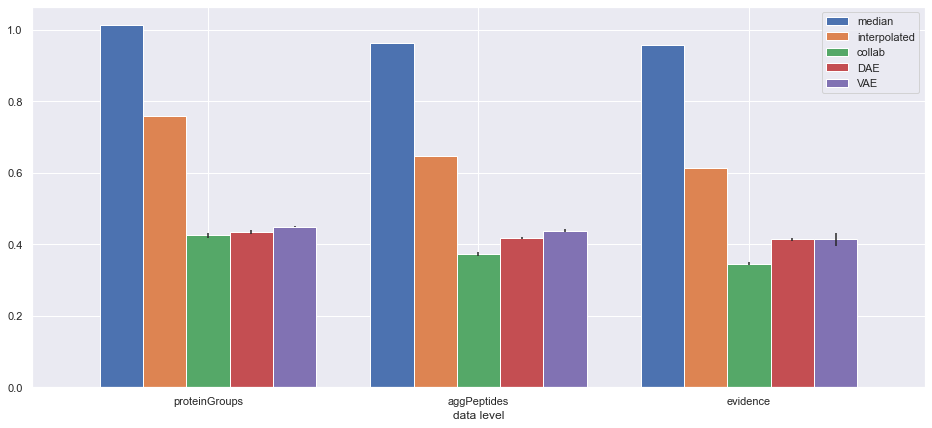

In [10]:
logger.setLevel(20) # reset debug
ax = to_plot['mean'].plot.bar(rot=0, width=.8, yerr=to_plot['std'])

In [11]:
level, split = 'NA interpolated', 'valid_fake_na'
selected = metrics.loc[pd.IndexSlice[level,
                          split,
                          :, 'MAE']].stack(1)
selected.index.names = ('x', 'split', 'model', 'metric', REPITITION_NAME)
# # selected.reset_index()
selected.stack().to_frame('MAE').reset_index()

,x,split,model,metric,repeat,data level,MAE
0,NA interpolated,valid_fake_na,median,MAE,0,aggPeptides,0.962
1,NA interpolated,valid_fake_na,median,MAE,0,evidence,0.957
2,NA interpolated,valid_fake_na,median,MAE,0,proteinGroups,1.014
3,NA interpolated,valid_fake_na,median,MAE,1,aggPeptides,0.962
4,NA interpolated,valid_fake_na,median,MAE,1,evidence,0.957
...,...,...,...,...,...,...,...
70,NA interpolated,valid_fake_na,VAE,MAE,3,evidence,0.427
71,NA interpolated,valid_fake_na,VAE,MAE,3,proteinGroups,0.452
72,NA interpolated,valid_fake_na,VAE,MAE,4,aggPeptides,0.440
73,NA interpolated,valid_fake_na,VAE,MAE,4,evidence,0.411


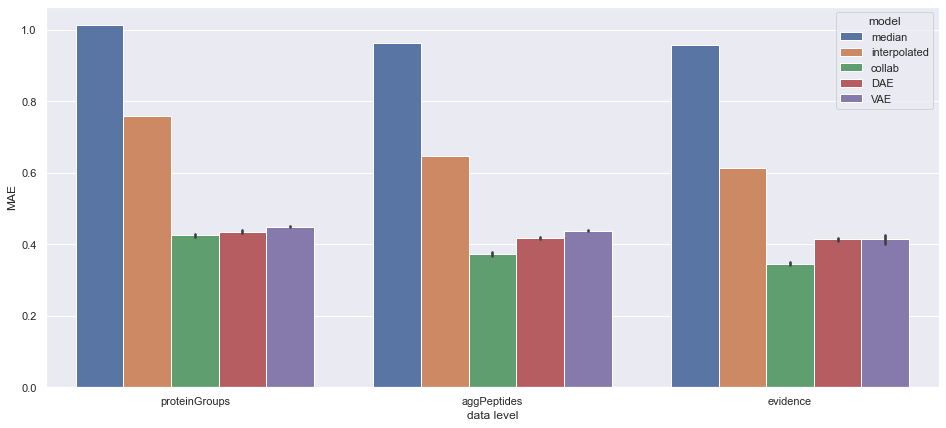

In [12]:
fig = sns.barplot(x='data level',
            y='MAE',
            hue='model',
            order = IDX[0],
            ci=95,
            data=selected.stack().to_frame('MAE').reset_index())
fig = ax.get_figure()

In [13]:
vaep.savefig(fig, FOLDER/ "model_performance_repeated_runs.pdf" )

vaep.plotting - INFO     Saved Figures to runs\repeat_best\model_performance_repeated_runs.pdf
